# In Depth - Drawing DiHypergraphs

Here we show the fuctionalities and parameters of `xgi.draw_dihypergraph()`.  It is similar to the [networkx](https://networkx.org/documentation/stable/reference/drawing.html) corresponding function (+ some bonus) and heavily relies on [matplotlib](https://matplotlib.org/)'s Collection plotting.

In [1]:
import xgi
import numpy as np
import matplotlib.pyplot as plt

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
diedges = [({0, 1}, {2}), ({1}, {4}), ({2, 3}, {4,5})]
DH = xgi.DiHypergraph(diedges)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x164af9eb0>,
  <matplotlib.collections.PathCollection at 0x164aecfa0>))

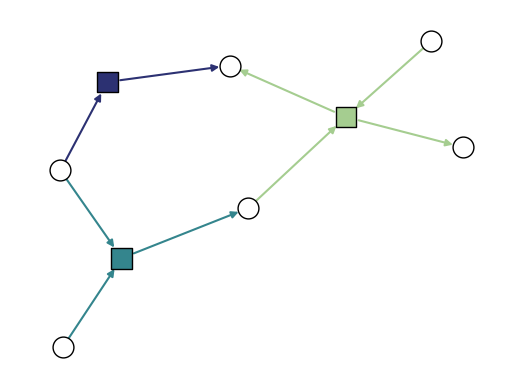

In [3]:
xgi.draw_dihypergraph(DH)

## Basics

Notice that this function returns a tuple `(ax, collections)` where `collections` is a tuple `(node_collection, edge_node_collection)`. The collections can be used to plot colorbars as we will see later.

The color, linewidth, transparancy, and style of the hyperedges can all be customised, for example with single values:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x164ca5730>,
  <matplotlib.collections.PathCollection at 0x164ca5a90>))

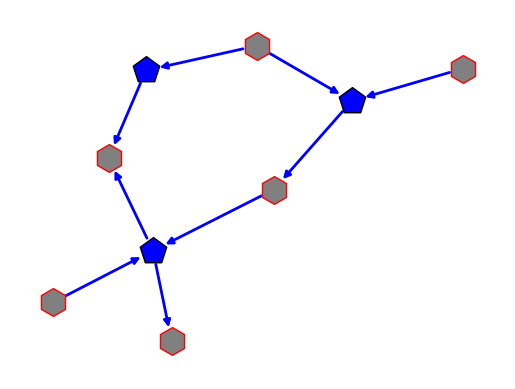

In [4]:
xgi.draw_dihypergraph(
    DH,
    node_shape="h",
    node_fc="grey",
    node_ec="r",
    node_size=20,
    edge_marker_size=20,
    edge_marker="p",
    lines_lw=2,
    arrowsize=10,
    edge_marker_fc="b",
    lines_fc="b",
)

Or with multiple values:

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/drawing/draw.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x164cfcfa0>,
  <matplotlib.collections.PathCollection at 0x164cfcf40>))

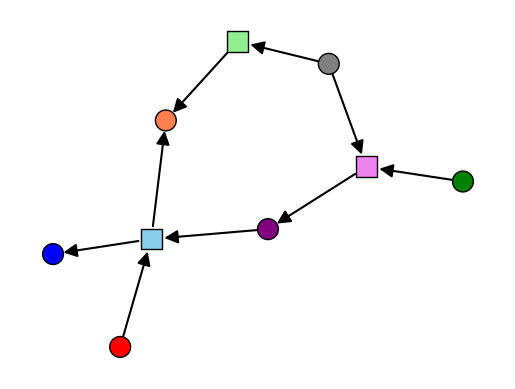

In [5]:
xgi.draw_dihypergraph(
    DH,
    node_fc=["g", "grey", "purple", "coral", "r", "b"],
    arrowsize=20,
    edge_marker_fc=["violet", "lightgreen", "skyblue"],
    lines_fc="k",
)

Adding node and edge labels:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x164d61040>,
  <matplotlib.collections.PathCollection at 0x164d80250>))

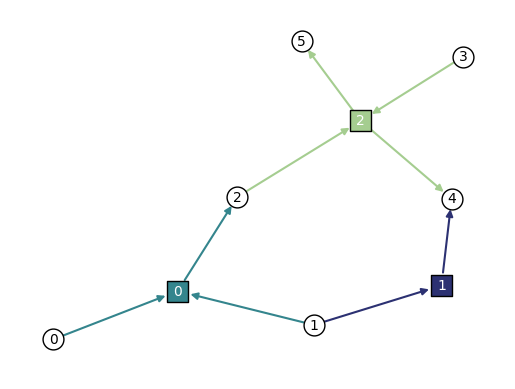

In [6]:
xgi.draw_dihypergraph(DH, node_labels=True, hyperedge_labels=True)

## Arrays of floats and colormaps

In XGI, you can easily color hyperedges according to an EdgeStat, or just an array or a dict with float values:

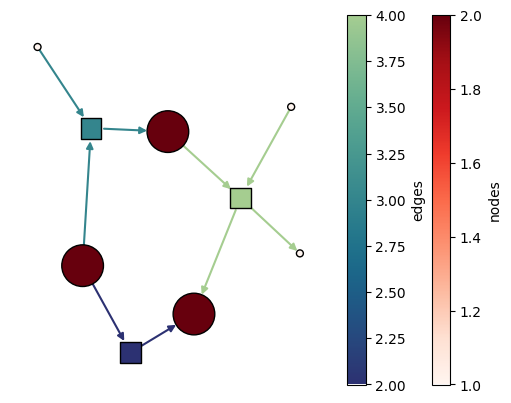

In [7]:
ax, collections = xgi.draw_dihypergraph(
    DH, node_fc=DH.nodes.degree, edge_marker_fc=DH.edges.size, node_size=DH.nodes.degree
)

node_coll, edge_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_coll, label="edges")

By default, the colormaps used are "crest_r" and "Reds". These can be changed:

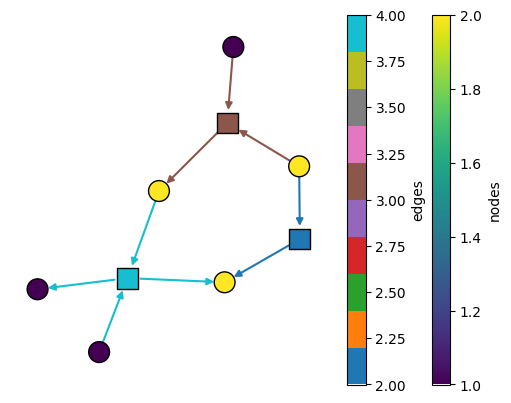

In [8]:
ax, collections = xgi.draw_dihypergraph(
    DH,
    node_fc=DH.nodes.degree,
    edge_marker_fc=DH.edges.size,
    node_fc_cmap="viridis",
    edge_marker_fc_cmap="tab10",
)

node_coll, edge_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_coll, label="edges")

## Layout

The initial layout is computed based on the original nodes only. After that, the layout can be recomputed based on those original positions, with the edge-nodes starting at the barycenter, to avoid overlap:

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x16504e430>,
  <matplotlib.collections.PathCollection at 0x16505ebe0>))

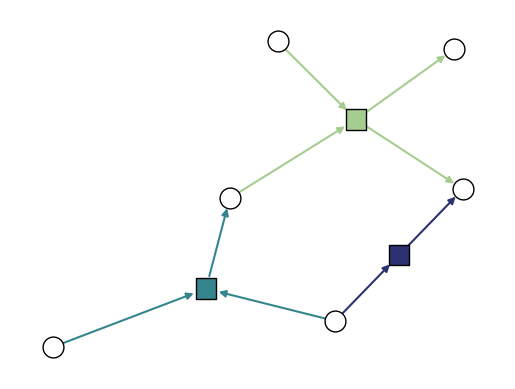

In [9]:
xgi.draw_dihypergraph(DH, iterations=0)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x165089af0>,
  <matplotlib.collections.PathCollection at 0x16509a9a0>))

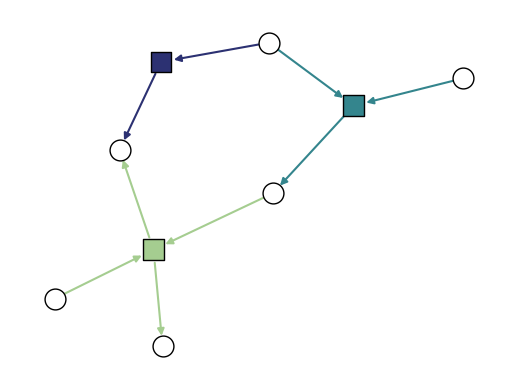

In [10]:
xgi.draw_dihypergraph(DH, iterations=50)

A larger example

In [11]:
edges = [
    [[8], [0]],
    [[1, 2], [0]],
    [[0, 3], [1]],
    [[1, 3], [2]],
    [[1, 5], [3]],
    [[2, 5], [4]],
    [[3, 4], [5, 6]],
    [[6, 7], [5]],
    [[5, 8], [6]],
    [[6, 8], [7]],
    [[6, 0], [8]],
    [[7, 0], [9]],
]

DH = xgi.DiHypergraph(edges)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x164ffb910>,
  <matplotlib.collections.PathCollection at 0x164a67220>))

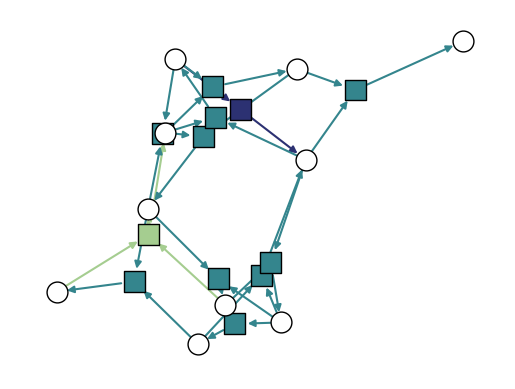

In [12]:
xgi.draw_dihypergraph(DH, iterations=0)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x1651a4790>,
  <matplotlib.collections.PathCollection at 0x164cfcd60>))

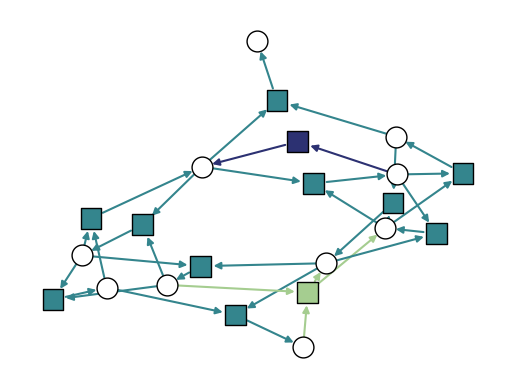

In [13]:
xgi.draw_dihypergraph(DH, iterations=50)